In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Check for Outliers and Skewness(0 > log transform; 0.5 > square root transform)
from scipy.stats import zscore, boxcox

# Data Pre-processing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Model Training and Validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# ML Algorithms
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Model Export
import joblib
from joblib import dump #from joblib import load > to load .pkl file

In [2]:
df = pd.read_csv('Portugal_Election_2019.csv', parse_dates=['time'])
df

TimeElapsed                time        territoryName  totalMandates  \
0                0 2019-10-06 20:10:02  Território Nacional              0   
1                0 2019-10-06 20:10:02  Território Nacional              0   
2                0 2019-10-06 20:10:02  Território Nacional              0   
3                0 2019-10-06 20:10:02  Território Nacional              0   
4                0 2019-10-06 20:10:02  Território Nacional              0   
...            ...                 ...                  ...            ...   
21638          265 2019-10-07 00:35:01                Viseu              8   
21639          265 2019-10-07 00:35:01                Viseu              8   
21640          265 2019-10-07 00:35:01                Viseu              8   
21641          265 2019-10-07 00:35:01                Viseu              8   
21642          265 2019-10-07 00:35:01                Viseu              8   

       availableMandates  numParishes  numParishesApproved  blankVotes  \
0                    226         3092                 1081        9652   
1                    226         3092                 1081        9652   
2                    226         3092                 1081        9652   
3                    226         3092                 1081        9652   
4                    226         3092                 1081        9652   
...                  ...          ...                  ...         ...   
21638                  0          277                  277        4995   
21639                  0          277                  277        4995   
21640                  0          277                  277        4995   
21641                  0          277                  277        4995   
21642                  0          277                  277        4995   

       blankVotesPercentage  nullVotes  ...  pre.votersPercentage  \
0                      2.50       8874  ...                 52.66   
1                      2.50       8874  ...                 52.66   
2                      2.50       8874  ...                 52.66   
3                      2.50       8874  ...                 52.66   
4                      2.50       8874  ...                 52.66   
...                     ...        ...  ...                   ...   
21638                  2.81       3700  ...                 51.28   
21639                  2.81       3700  ...                 51.28   
21640                  2.81       3700  ...                 51.28   
21641                  2.81       3700  ...                 51.28   
21642                  2.81       3700  ...                 51.28   

       pre.subscribedVoters  pre.totalVoters    Party  Mandates  Percentage  \
0                    813743           428546       PS         0       38.29   
1                    813743           428546  PPD/PSD         0       33.28   
2                    813743           428546     B.E.         0        6.81   
3                    813743           428546   CDS-PP         0        4.90   
4                    813743           428546  PCP-PEV         0        4.59   
...                     ...              ...      ...       ...         ...   
21638                371931           190712       NC         0        0.19   
21639                371931           190712      PNR         0        0.18   
21640                371931           190712      MPT         0        0.14   
21641                371931           190712      PTP         0        0.13   
21642                371931           190712      JPP         0        0.07   

       validVotesPercentage   Votes  Hondt  FinalMandates  
0                     40.22  147993     94            106  
1                     34.95  128624     81             77  
2                      7.15   26307     16             19  
3                      5.14   18923     12              5  
4                      4.83   17757     11             12  
...                     ...     ...    ... 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
TimeElapsed                 21643 non-null int64
time                        21643 non-null datetime64[ns]
territoryName               21643 non-null object
totalMandates               21643 non-null int64
availableMandates           21643 non-null int64
numParishes                 21643 non-null int64
numParishesApproved         21643 non-null int64
blankVotes                  21643 non-null int64
blankVotesPercentage        21643 non-null float64
nullVotes                   21643 non-null int64
nullVotesPercentage         21643 non-null float64
votersPercentage            21643 non-null float64
subscribedVoters            21643 non-null int64
totalVoters                 21643 non-null int64
pre.blankVotes              21643 non-null int64
pre.blankVotesPercentage    21643 non-null float64
pre.nullVotes               21643 non-null int64
pre.nullVotesPercentage     21643 non-nu

In [4]:
df.columns

Index(['TimeElapsed', 'time', 'territoryName', 'totalMandates',
       'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes',
       'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage',
       'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes',
       'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage',
       'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters',
       'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes',
       'Hondt', 'FinalMandates'],
      dtype='object')

In [5]:
df.loc[:,'votersPercentage':].describe()

votersPercentage  subscribedVoters   totalVoters  pre.blankVotes  \
count      21643.000000      2.164300e+04  2.164300e+04    21643.000000   
mean          51.983722      6.275367e+05  3.390741e+05     7608.001386   
std            4.854380      1.525590e+06  8.290404e+05    18493.107257   
min           35.980000      5.767000e+03  2.833000e+03       32.000000   
25%           50.290000      1.229870e+05  6.267100e+04     1130.000000   
50%           53.130000      2.289540e+05  1.060120e+05     2595.000000   
75%           54.550000      3.804890e+05  2.069180e+05     5929.000000   
max           59.870000      9.343084e+06  5.092424e+06   112666.000000   

       pre.blankVotesPercentage  pre.nullVotes  pre.nullVotesPercentage  \
count              21643.000000   21643.000000             21643.000000   
mean                   2.071985    5914.629950                 1.777442   
std                    0.518025   14236.038023                 0.388798   
min                    0.800000      40.000000                 1.140000   
25%                    1.740000    1124.000000                 1.520000   
50%                    2.030000    2141.000000                 1.690000   
75%                    2.370000    3967.000000                 1.970000   
max                    3.660000   86473.000000                 3.120000   

       pre.votersPercentage  pre.subscribedVoters  pre.totalVoters  \
count          21643.000000          2.164300e+04     2.164300e+04   
mean              54.549372          6.378503e+05     3.594932e+05   
std                4.964948          1.544418e+06     8.763729e+05   
min               40.870000          6.383000e+03     3.215000e+03   
25%               51.210000          1.289260e+05     6.964400e+04   
50%               56.260000          2.284970e+05     1.102730e+05   
75%               58.220000          3.933140e+05     2.276200e+05   
max               62.580000          9.439701e+06     5.380451e+06   

           Mandates    Percentage  validVotesPercentage         Votes  \
count  21643.000000  21643.000000          21643.000000  2.164300e+04   
mean       0.565495      4.968484              5.207232  1.585209e+04   
std        4.421804     10.379967             10.881108  9.310605e+04   
min        0.000000      0.020000              0.020000  1.000000e+00   
25%        0.000000      0.220000              0.230000  2.360000e+02   
50%        0.000000      0.620000              0.650000  7.900000e+02   
75%        0.000000      3.010000              3.160000  4.510000e+03   
max      106.000000     49.110000             51.420000  1.866407e+06   

              Hondt  FinalMandates  
count  21643.000000   21643.000000  
mean       1.126138       1.126138  
std        6.293552       6.872644  
min        0.000000       0.000000  
25%        0.000000       0.000000  
50%        0.000000       0.000000  
75%        0.000000       0.000000  
max       94.000000     106.000000

Observations:
    1. Majority of the features have outliers.
    2. Majority of the values in Mandates, FinalMandates and Hondt is 0.
    3. We have no missing values.
    4. 2 object type.

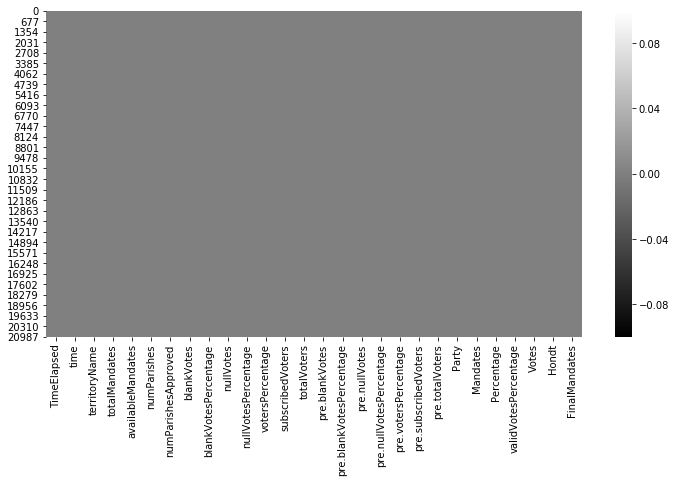

In [6]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cmap='gray')

In [7]:
for i in df.columns:
    print('#######',i,'#######')
    if df[i].nunique()>15:
        print('>> Number of Unique Values ::', df[i].nunique())
        print('>> Number for Null Values ::', df[i].isnull().sum())
        print(df[i].describe(), '\n')
    else:
        print('>> Number of Unique Values ::', df[i].nunique())
        print('>> Number for Null Values ::', df[i].isnull().sum(), '\n')
        print(df[i].unique())

####### TimeElapsed #######
>> Number of Unique Values :: 54
>> Number for Null Values :: 0
count    21643.000000
mean       133.146052
std         77.651193
min          0.000000
25%         65.000000
50%        135.000000
75%        200.000000
max        265.000000
Name: TimeElapsed, dtype: float64 

####### time #######
>> Number of Unique Values :: 54
>> Number for Null Values :: 0
count                   21643
unique                     54
top       2019-10-06 21:00:01
freq                      403
first     2019-10-06 20:10:02
last      2019-10-07 00:35:01
Name: time, dtype: object 

####### territoryName #######
>> Number of Unique Values :: 21
>> Number for Null Values :: 0
count     21643
unique       21
top       Braga
freq       1134
Name: territoryName, dtype: object 

####### totalMandates #######
>> Number of Unique Values :: 62
>> Number for Null Values :: 0
count    21643.000000
mean        11.544795
std         31.314567
min          0.000000
25%          1.000000
50% 

In [8]:
sorted(df['time'].unique())

[numpy.datetime64('2019-10-06T20:10:02.000000000'),
 numpy.datetime64('2019-10-06T20:15:02.000000000'),
 numpy.datetime64('2019-10-06T20:20:02.000000000'),
 numpy.datetime64('2019-10-06T20:25:02.000000000'),
 numpy.datetime64('2019-10-06T20:30:02.000000000'),
 numpy.datetime64('2019-10-06T20:35:02.000000000'),
 numpy.datetime64('2019-10-06T20:40:02.000000000'),
 numpy.datetime64('2019-10-06T20:45:02.000000000'),
 numpy.datetime64('2019-10-06T20:50:01.000000000'),
 numpy.datetime64('2019-10-06T20:55:01.000000000'),
 numpy.datetime64('2019-10-06T21:00:01.000000000'),
 numpy.datetime64('2019-10-06T21:05:01.000000000'),
 numpy.datetime64('2019-10-06T21:10:01.000000000'),
 numpy.datetime64('2019-10-06T21:15:02.000000000'),
 numpy.datetime64('2019-10-06T21:20:02.000000000'),
 numpy.datetime64('2019-10-06T21:25:02.000000000'),
 numpy.datetime64('2019-10-06T21:30:01.000000000'),
 numpy.datetime64('2019-10-06T21:35:01.000000000'),
 numpy.datetime64('2019-10-06T21:40:02.000000000'),
 numpy.datet

In [9]:
df['TimeElapsed'].unique()

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
       130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
       195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
       260, 265], dtype=int64)

'TimeElapsed' is the numerical form of 'time' and  we can drop it after extracting hrs and mins. We will create another feature for date.

In [10]:
df['time_hrs'], df['time_mins'] = np.nan, np.nan
for i, j in enumerate(df['time']):
    df['time_hrs'][i] = j.hour
    df['time_mins'][i] = j.minute

In [11]:
df['time_day_6'] = np.nan
for i, j in enumerate(df['time']):
    if j.day==6:
        df['time_day_6'][i] = 0
    else: df['time_day_6'][i] = 1

In [12]:
df['territoryName'].unique()

array(['Território Nacional', 'Aveiro', 'Beja', 'Braga', 'Bragança',
       'Castelo Branco', 'Coimbra', 'Évora', 'Faro', 'Guarda', 'Leiria',
       'Lisboa', 'Madeira', 'Portalegre', 'Porto', 'Santarém', 'Setúbal',
       'Viana do Castelo', 'Vila Real', 'Viseu', 'Açores'], dtype=object)

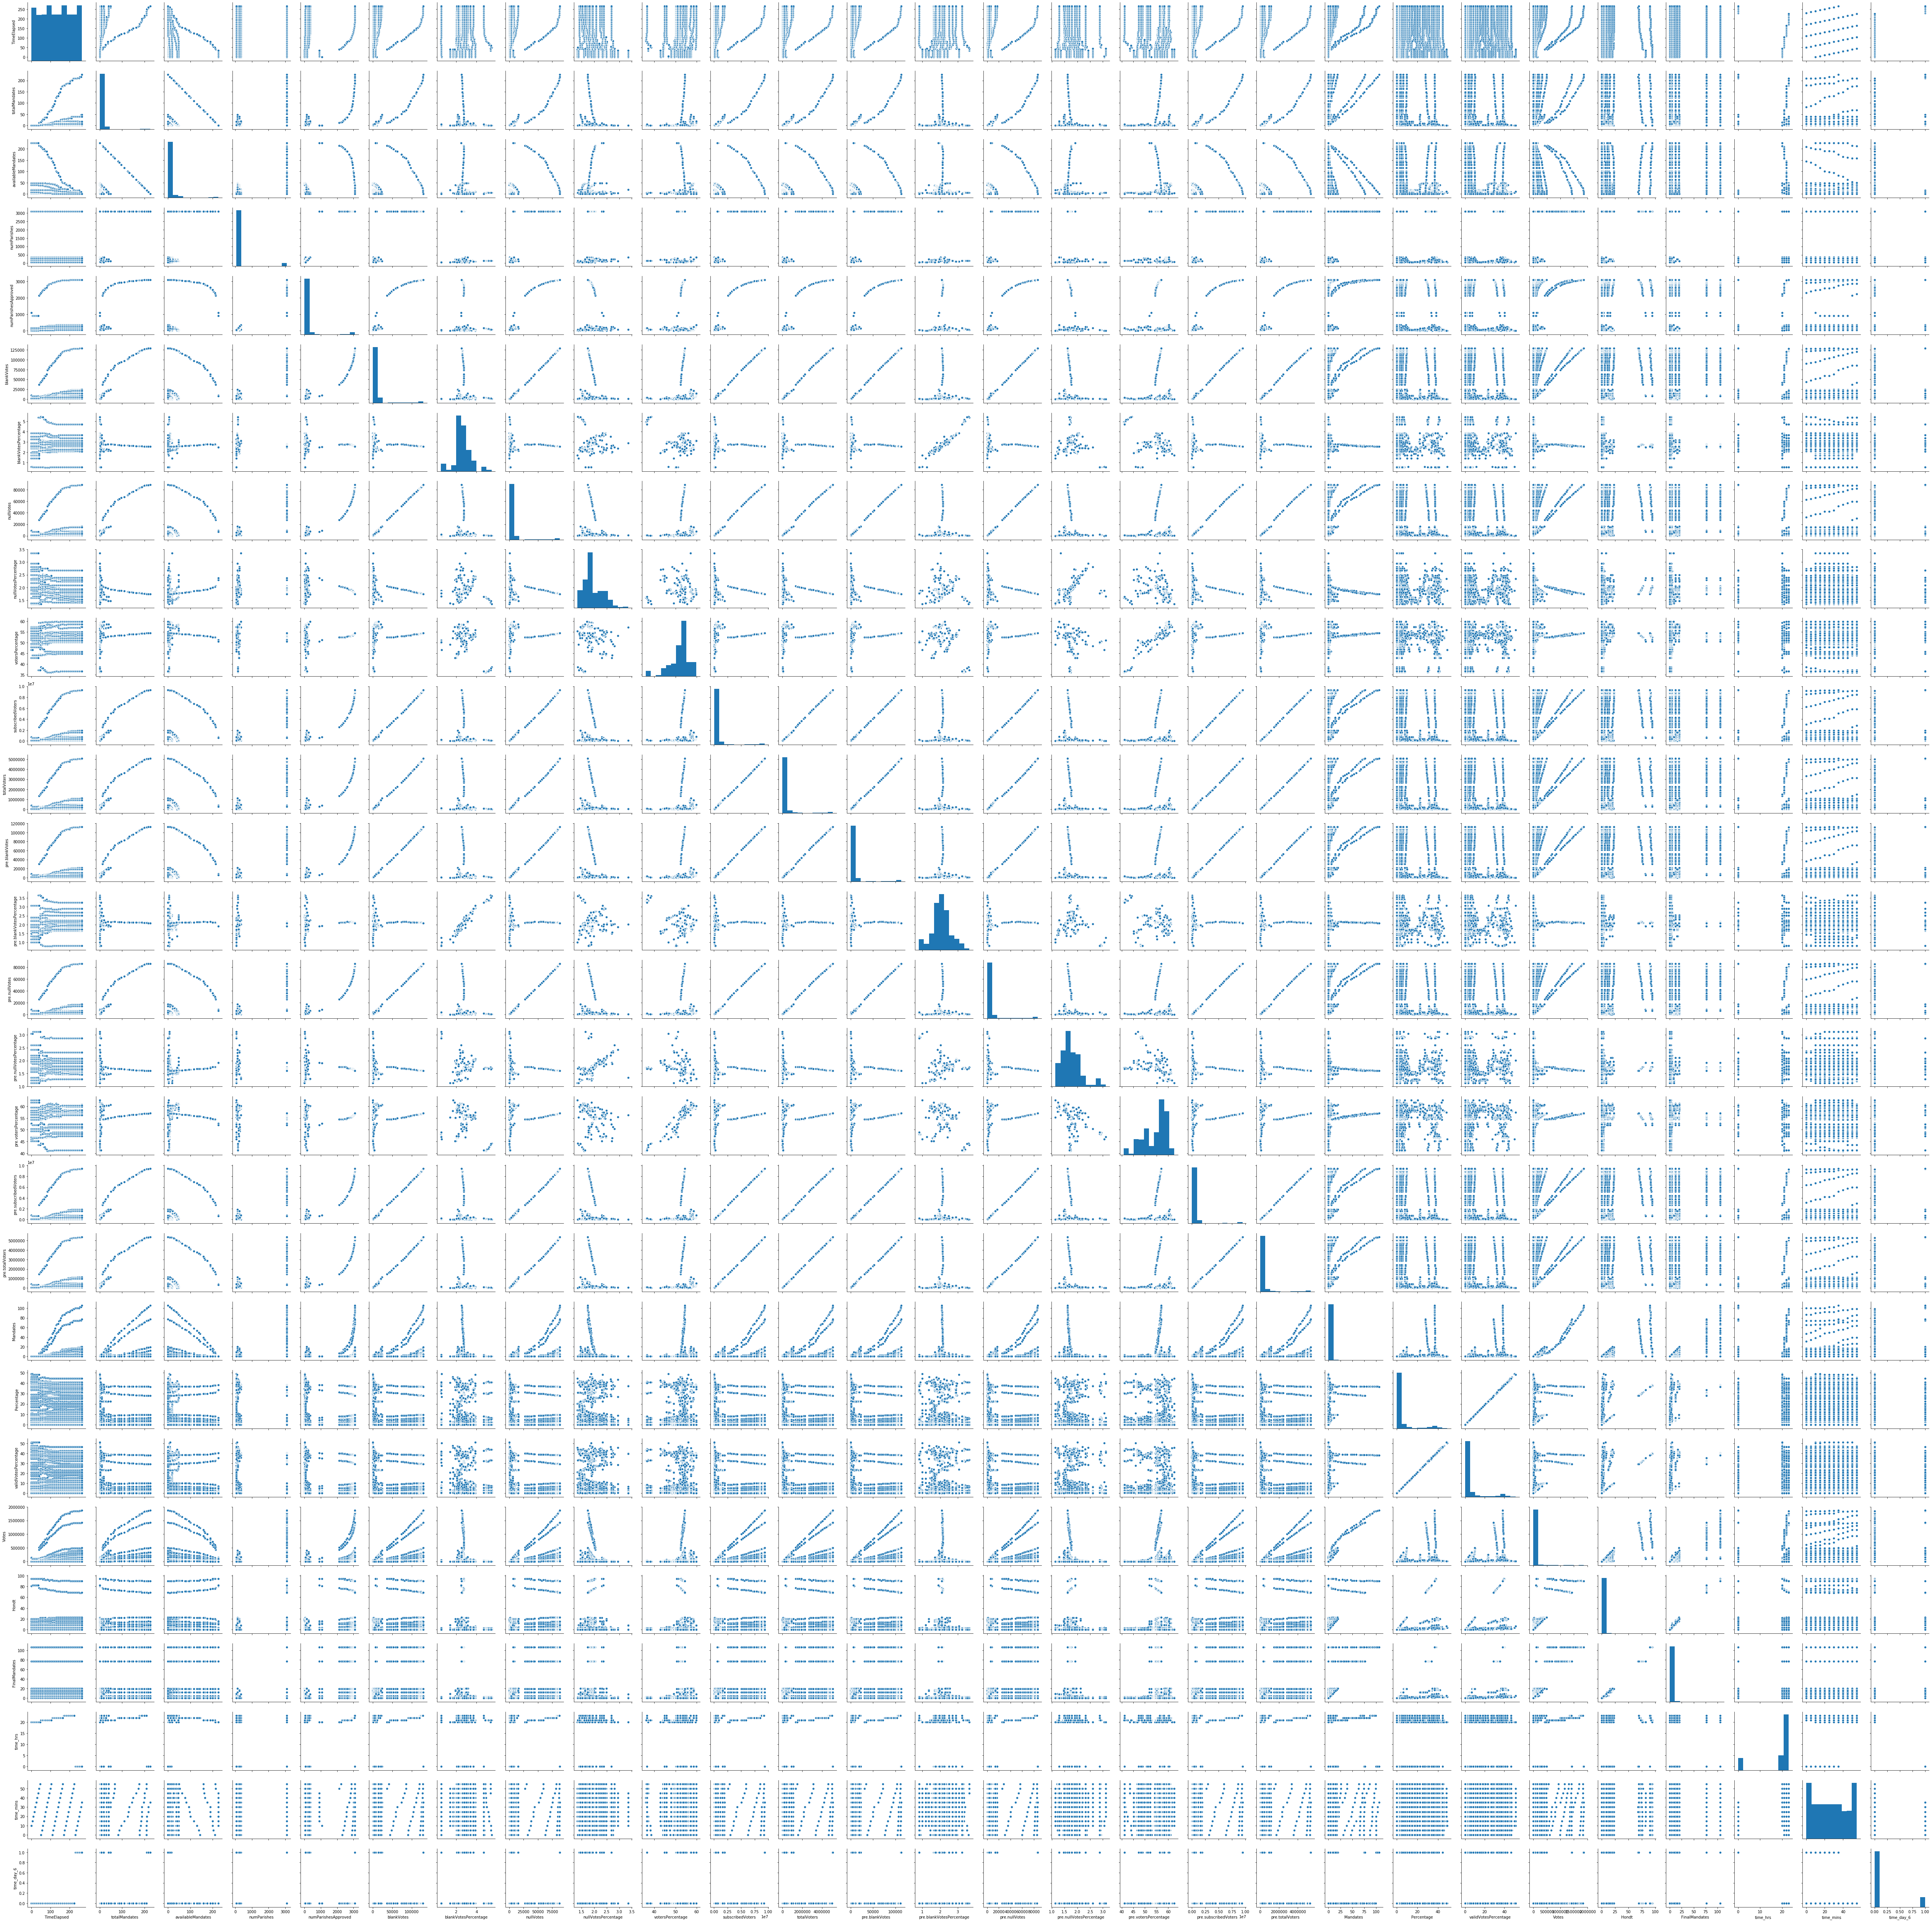

In [13]:
sns.pairplot(df)

In [ ]:
df.drop(columns=['blankVotes', 'nullVotes', 'pre.blankVotes', 'pre.nullVotes', 'time'], axis=1, inplace=True)

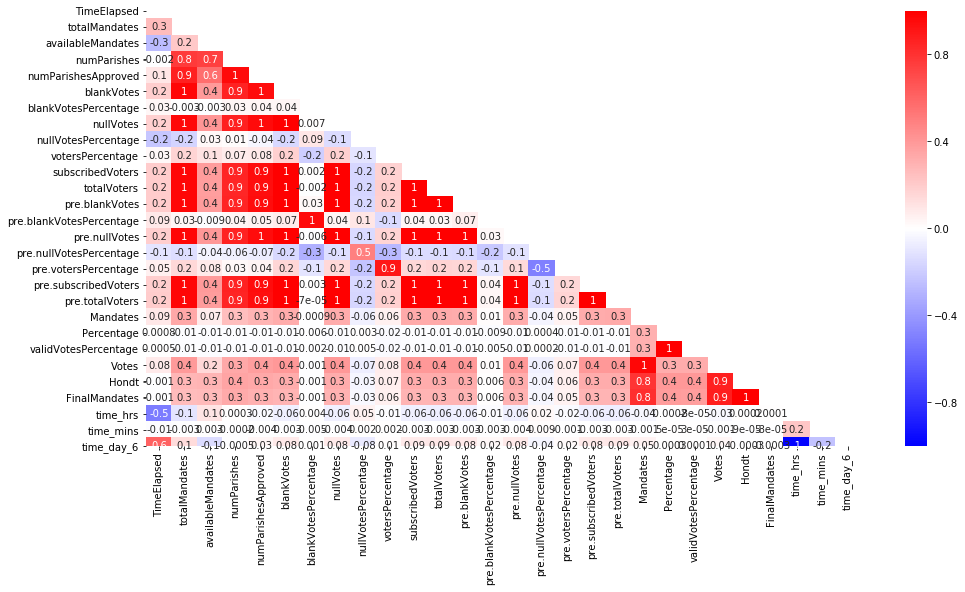

In [15]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), vmax=1, vmin=-1, annot= True, fmt='.1g', cmap='bwr', mask=np.triu(df.corr()))

Observations:
    1. We have lot of hightly correlated features.
    2. We will remove few features that are highly correlated.
    3. Noticed that time_hrs and time_day_6 is highly -vely correlated.
    4. pre.nullVotesPercentage and pre.VotersPercentage is also -vely correlated.

In [18]:
cat_df, num_df = [], []
for i in df:
    if df[i].dtypes=='object':
        cat_df.append(i)
    elif (df[i].dtypes=='int') | (df[i].dtypes=='float') | (df[i].dtypes=='int64'):
        num_df.append(i)
    else: print('Other >', i)
print('>>> Total Number of Features ::', df.shape[1])
print('>>> Number of Categorical Features ::', len(cat_df))
print('>>> Number of Numerical Features ::', len(num_df))

>>> Total Number of Features :: 26
>>> Number of Categorical Features :: 2
>>> Number of Numerical Features :: 24


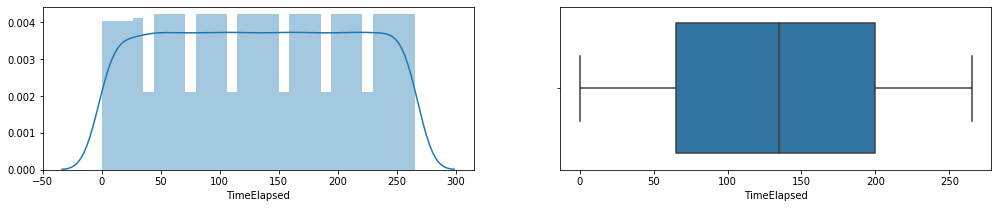

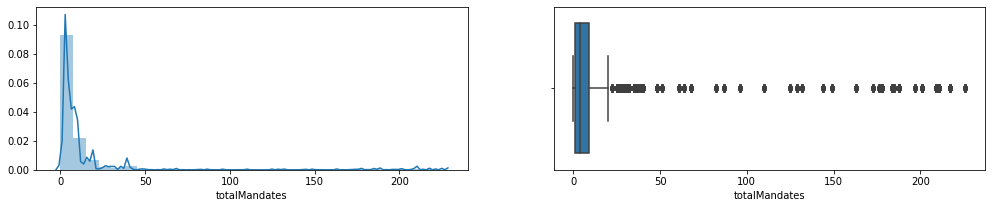

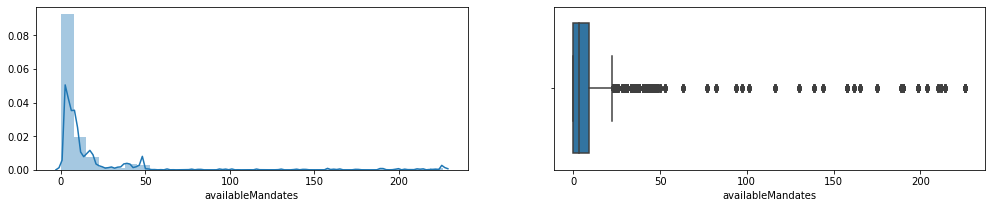

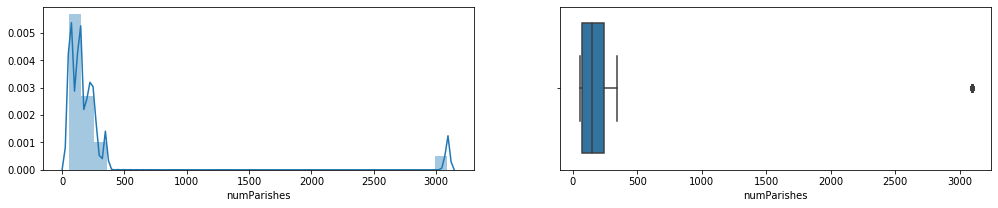

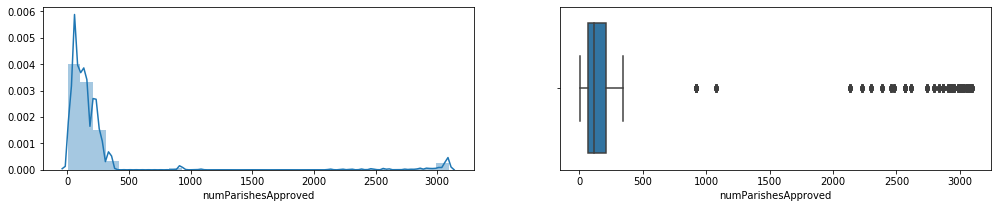

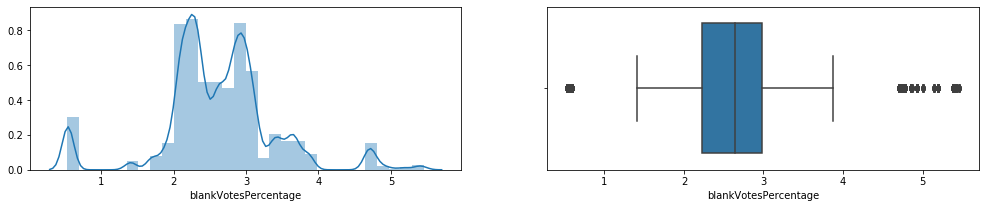

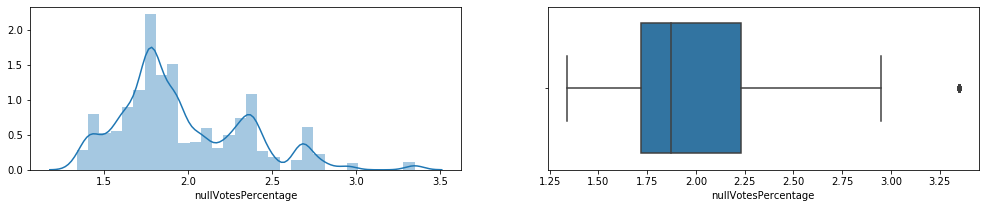

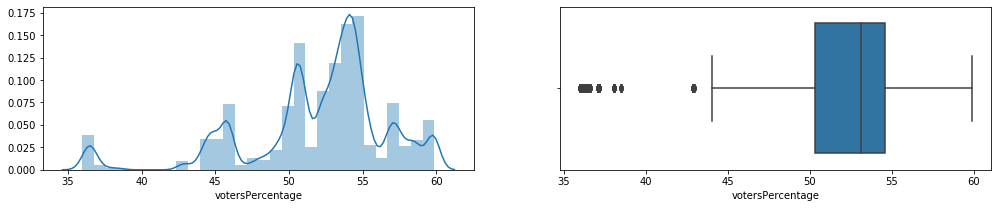

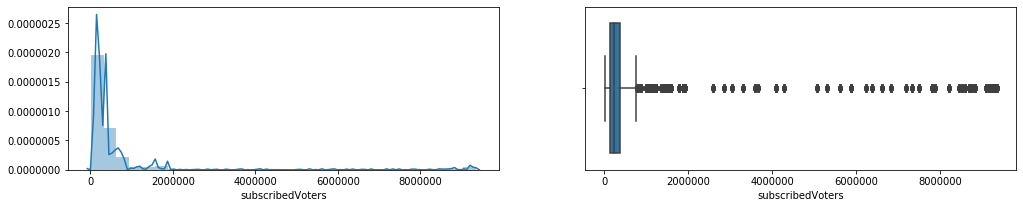

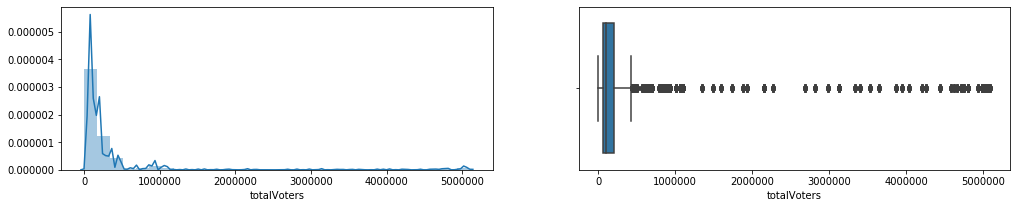

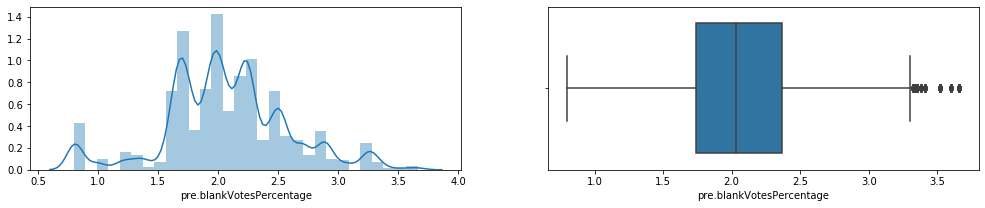

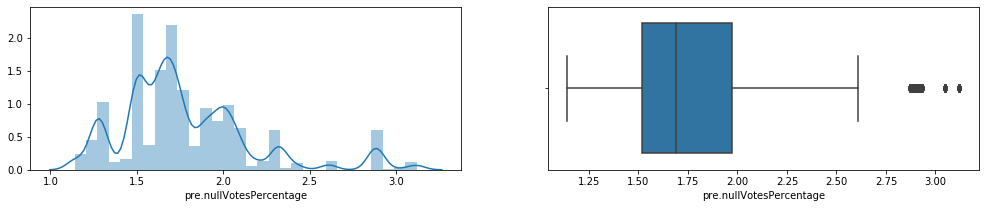

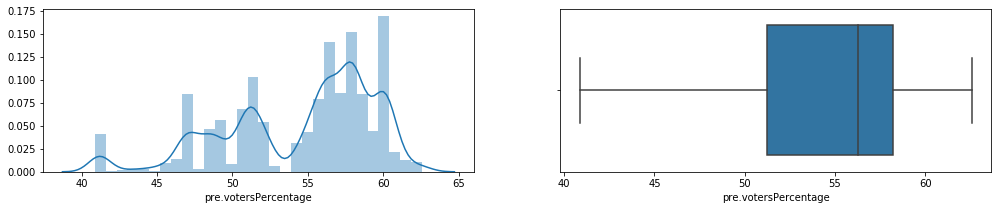

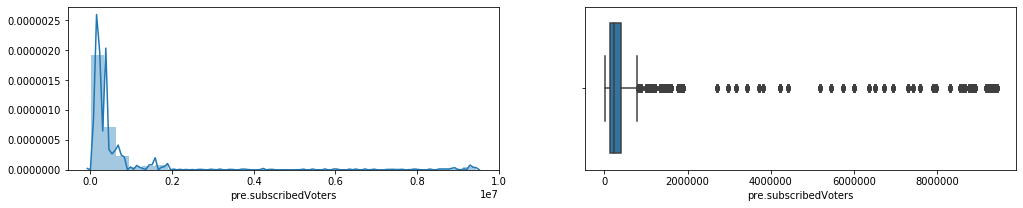

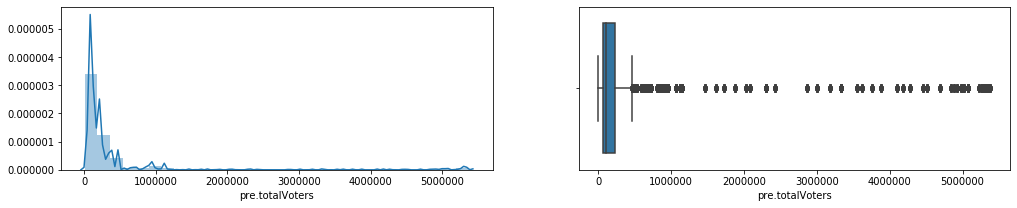

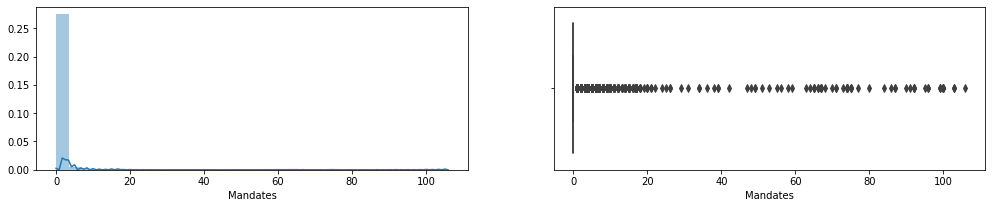

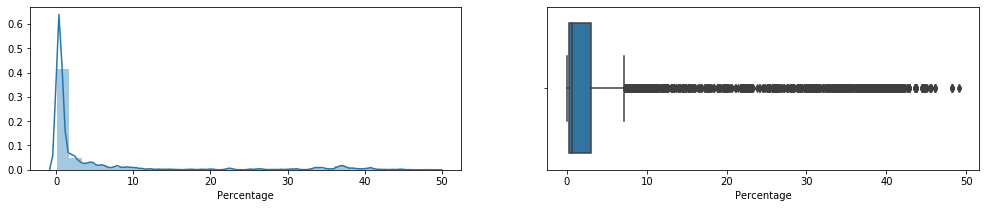

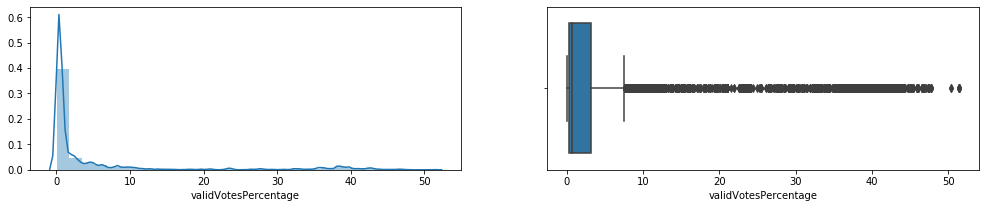

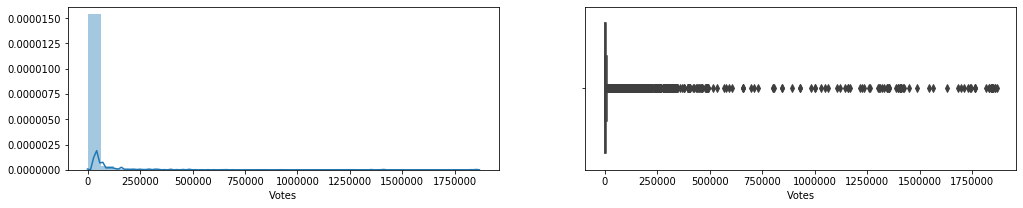

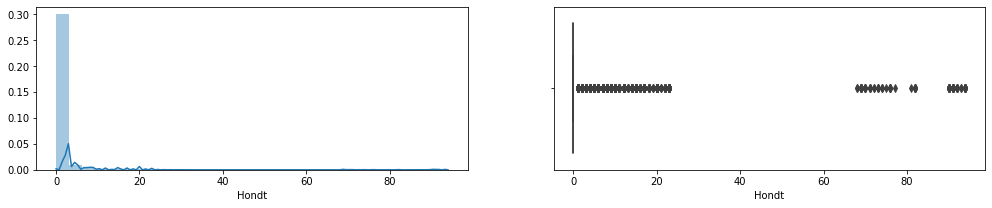

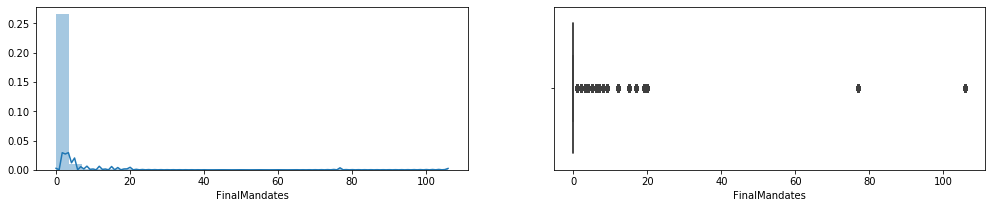

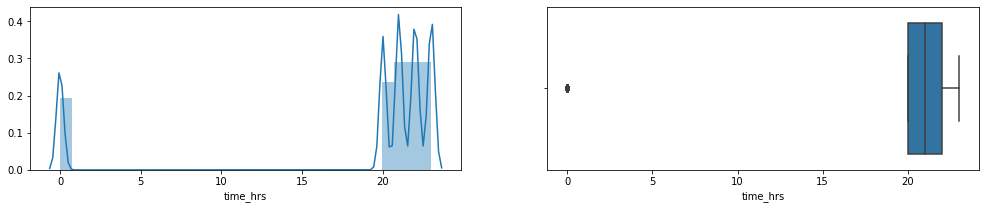

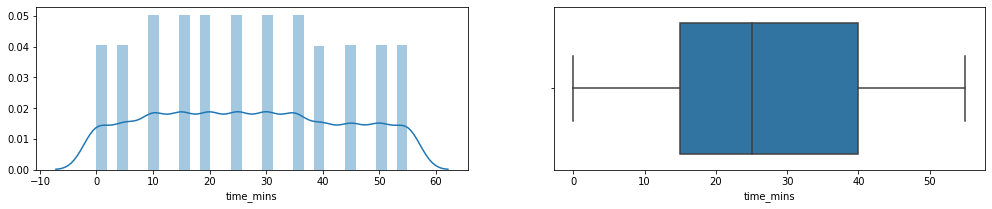

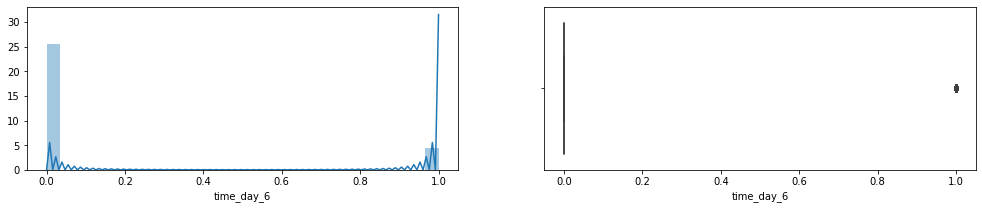

In [19]:
#Univariate analysis for num_df
skewness, skew_name = [], []
for i in num_df:
    f=plt.figure(figsize=(17,3))
    f.add_subplot(1,2,1)
    sns.distplot(df[i],bins=30)
    f.add_subplot(1,2,2)
    sns.boxplot(df[i])
    skewness.append(round(df[i].skew(),2))
    skew_name.append(i)

In [20]:
skew_df = pd.DataFrame(skewness, index=[skew_name], columns=['Skewness']).sort_values(by='Skewness', ascending=False)
skew_df[skew_df['Skewness'] > 0.55].T

Mandates  Votes FinalMandates  Hondt totalMandates availableMandates  \
Skewness    16.58  13.94          12.4  11.49          5.15              5.13   

         subscribedVoters pre.subscribedVoters pre.totalVoters totalVoters  \
Skewness             4.57                 4.57            4.55        4.54   

         numParishesApproved numParishes validVotesPercentage Percentage  \
Skewness                4.24        3.92                 2.54       2.54   

         time_day_6 pre.nullVotesPercentage nullVotesPercentage  
Skewness       1.97                    1.23                0.86

In [21]:
for i in ['numParishesApproved', 'numParishes']:
    df['Log_'+ i] = np.log10(df[i])

In [22]:
for i in ['numParishesApproved', 'numParishes']:
    print('Skewness of', i, 'is', df[i].skew())
    print('>> Skewness of', ('Log_'+ i), 'is', df['Log_'+ i].skew())

Skewness of numParishesApproved is 4.238342855605011
>> Skewness of Log_numParishesApproved is 0.25548536088666346
Skewness of numParishes is 3.920432521474575
>> Skewness of Log_numParishes is 1.7085236315891263


1. totalMandates and availableMandates has 0's and cannot use log10 to remove skewness.
2. Skewness in numParishes was reduced, but not below 0.55.

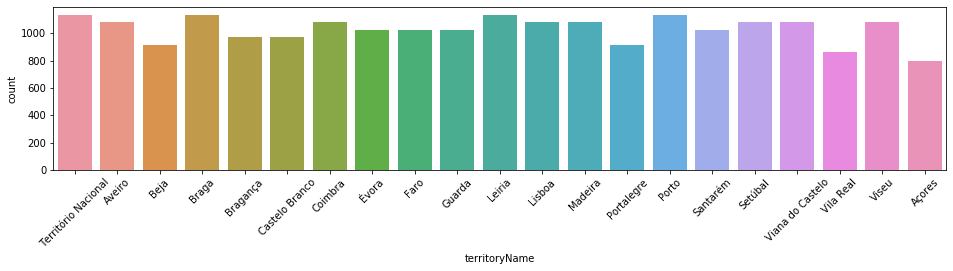

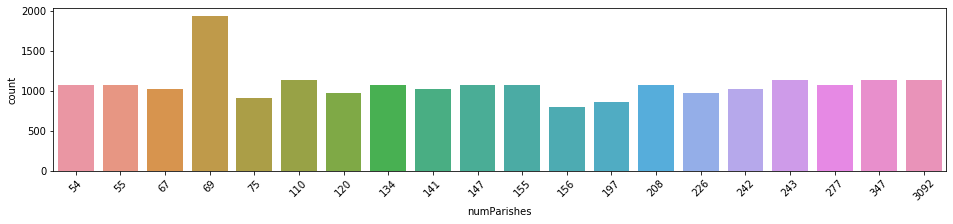

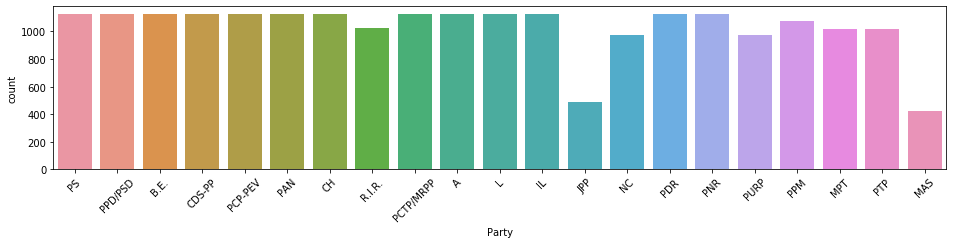

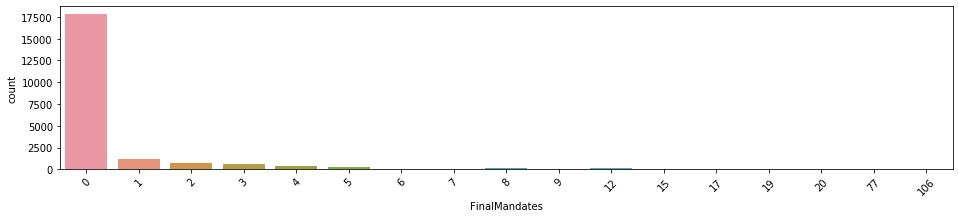

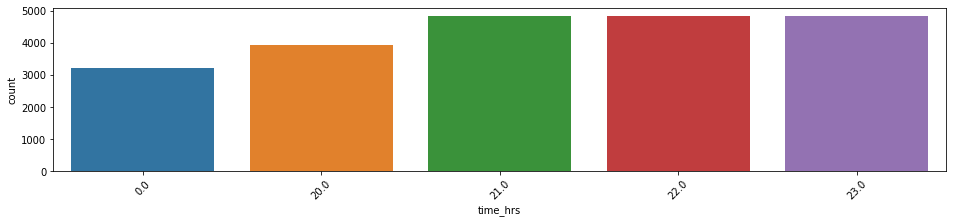

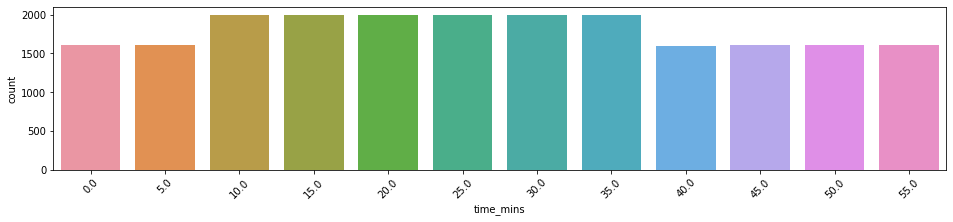

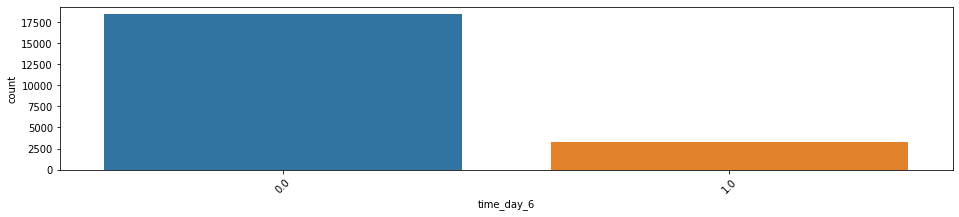

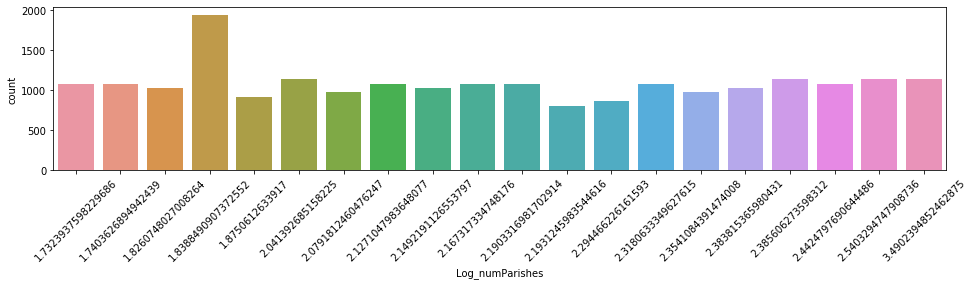

In [23]:
for i in df:
    if df[i].nunique() < 30:
        plt.figure(figsize=(16,3))
        plt.xticks(rotation=45)
        sns.countplot(df[i])
    else: continue

We have lot of Zero's for Final Mandates. Let create another DataFrame without these and see how it turns out.

In [24]:
df1 = df[df['FinalMandates']>0]

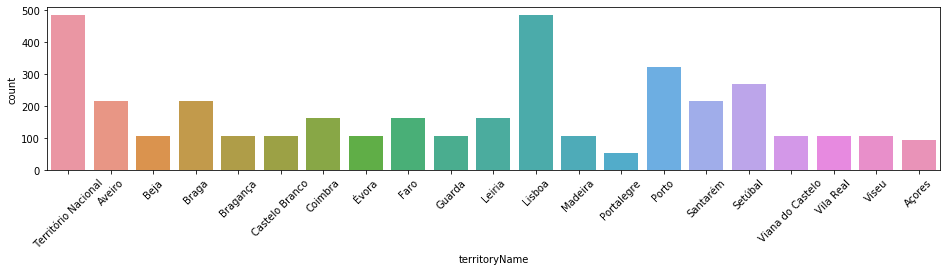

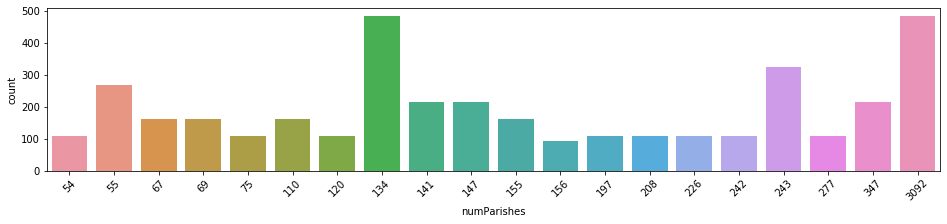

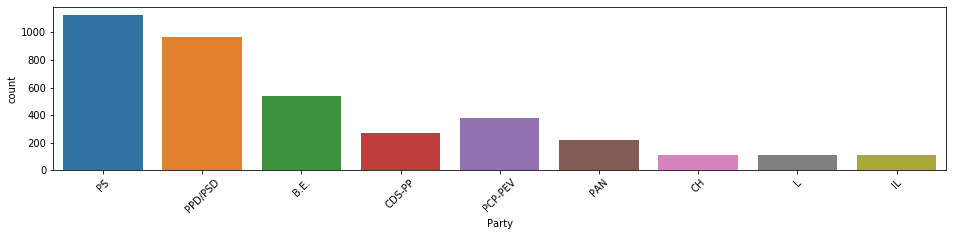

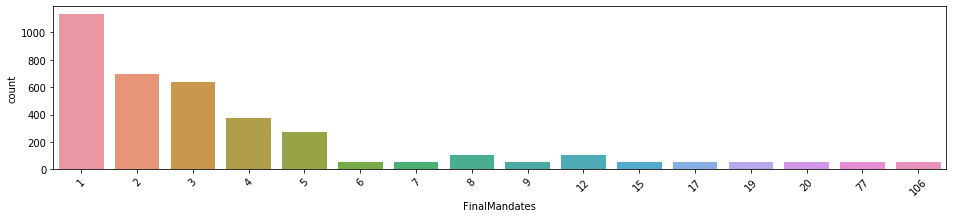

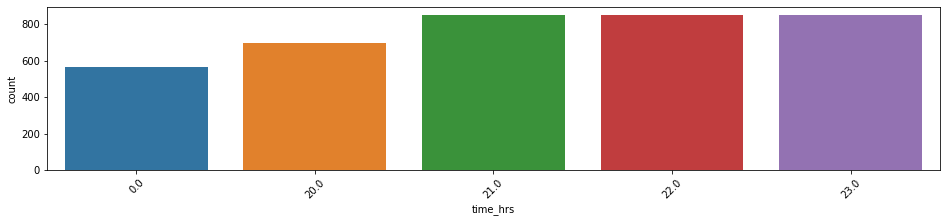

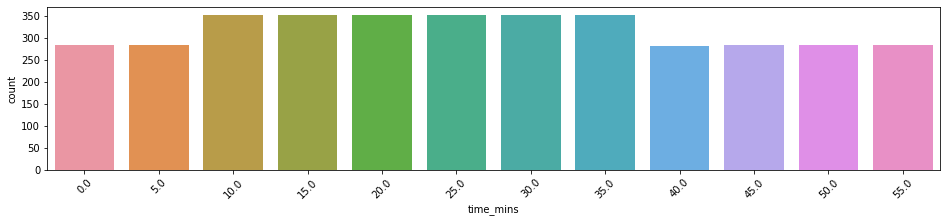

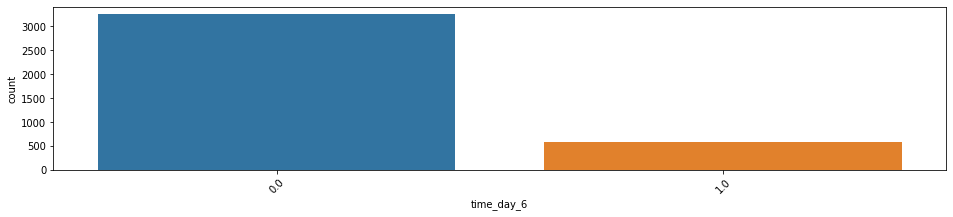

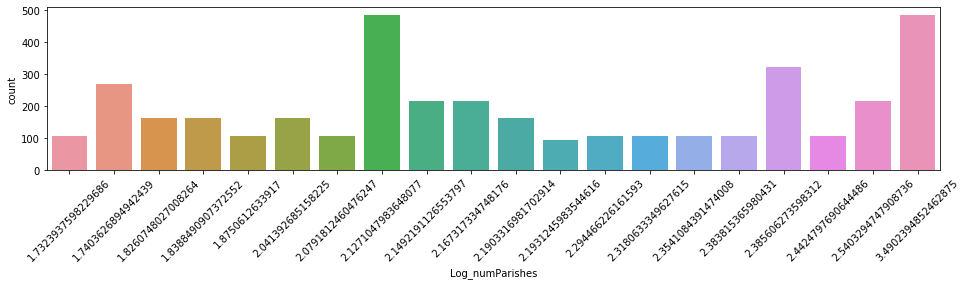

In [25]:
for i in df1:
    if df1[i].nunique() < 30:
        plt.figure(figsize=(16,3))
        plt.xticks(rotation=45)
        sns.countplot(df1[i])
    else: continue

We have more features that will become inconsistent if we ignore 0's in 'FinalMandates'. Let's go back to the original df.

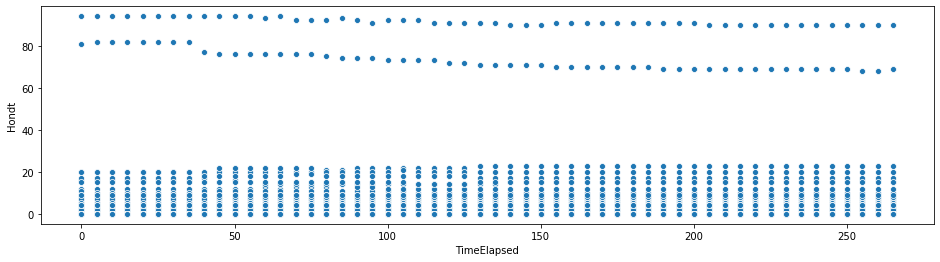

In [26]:
# Bivariate analysis
plt.figure(figsize=(16,4))
sns.scatterplot(x='TimeElapsed', y='Hondt', data=df)

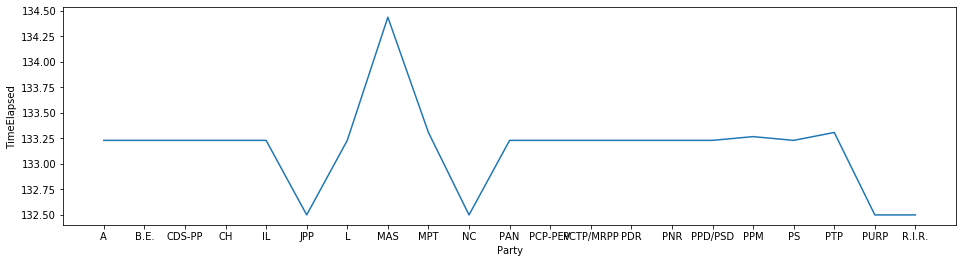

In [27]:
# Bivariate analysis
plt.figure(figsize=(16,4))
sns.lineplot(x='Party', y='TimeElapsed', data=df, ci=None)

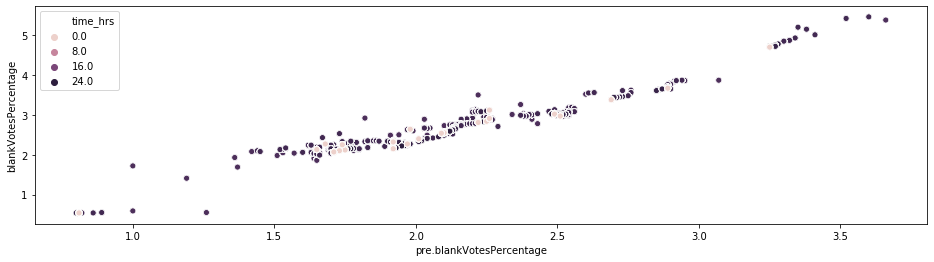

In [28]:
# Bivariate analysis
plt.figure(figsize=(16,4))
sns.scatterplot(x='pre.blankVotesPercentage', y='blankVotesPercentage', data=df, hue='time_hrs', ci=None)

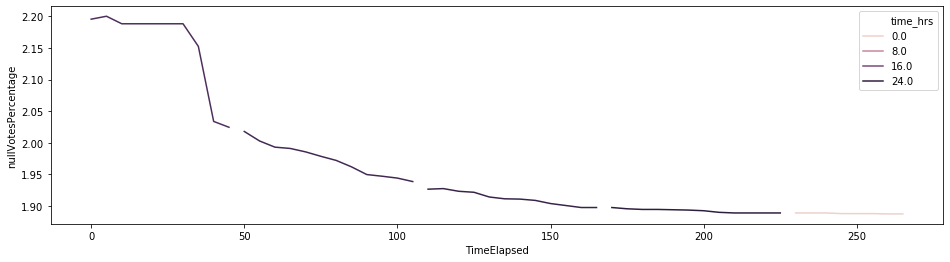

In [29]:
# Bivariate analysis
plt.figure(figsize=(16,4))
sns.lineplot(x='TimeElapsed', y='nullVotesPercentage', data=df, hue='time_hrs', ci=None)

Text(0.5, 1.0, 'nullVotesPercentage & blankVotesPercentage Relationship in Time')

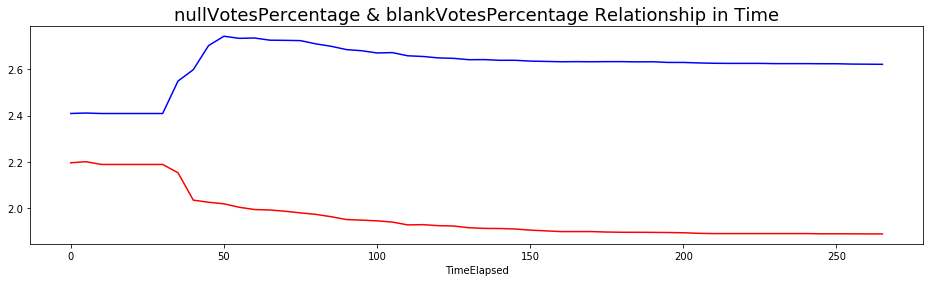

In [30]:
# Bivariate analysis
plt.figure(figsize=(16,4))
sns.lineplot(x='TimeElapsed', y='nullVotesPercentage', data=df, ci=None, color='red')
sns.lineplot(x='TimeElapsed', y='blankVotesPercentage', data=df, ci=None, color='blue')
plt.ylabel('')
plt.title('nullVotesPercentage & blankVotesPercentage Relationship in Time', fontsize=18)

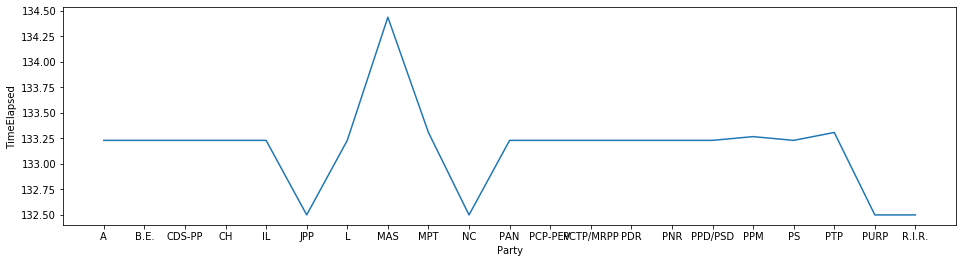

In [31]:
# Bivariate analysis
plt.figure(figsize=(16,4))
sns.lineplot(x='Party', y='TimeElapsed', data=df, ci=None)

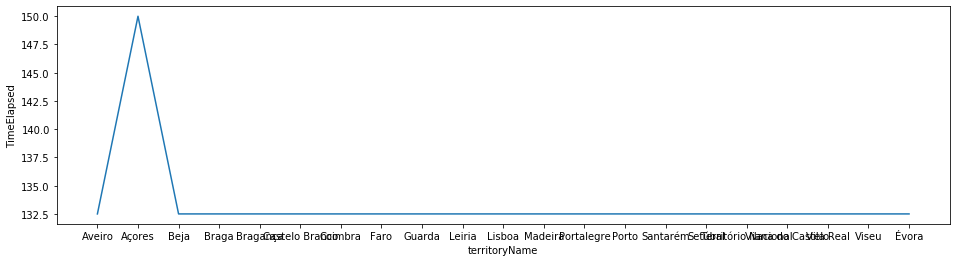

In [32]:
# Bivariate analysis
plt.figure(figsize=(16,4))
sns.lineplot(x='territoryName', y='TimeElapsed', data=df, ci=None)

In [34]:
df.drop(columns=['numParishesApproved', 'numParishes'], axis=1, inplace=True)

## Removing Outliers using ZScore

In [35]:
cat_df, num_df = [], []
for i in df:
    if df[i].dtypes=='object':
        cat_df.append(i)
    elif (df[i].dtypes=='int') | (df[i].dtypes=='float') | (df[i].dtypes=='int64'):
        num_df.append(i)
    else: print('Unknown >', i)
print('>>> Total Number of Features ::', df.shape[1])
print('>>> Number of Categorical Features ::', len(cat_df))
print('>>> Number of Numerical Features ::', len(num_df))

>>> Total Number of Features :: 26
>>> Number of Categorical Features :: 2
>>> Number of Numerical Features :: 24


In [36]:
z = np.abs(zscore(df[num_df]))

In [37]:
#consider threshold = 3
np.where(z>3)

(array([    0,     0,     0, ..., 21608, 21623, 21623], dtype=int64),
 array([ 2, 14, 15, ..., 15, 14, 15], dtype=int64))

In [38]:
df=df[(z<3).all(axis=1)]
df

TimeElapsed territoryName  totalMandates  availableMandates  \
22               0        Aveiro              0                 16   
23               0        Aveiro              0                 16   
24               0        Aveiro              0                 16   
25               0        Aveiro              0                 16   
26               0        Aveiro              0                 16   
...            ...           ...            ...                ...   
21638          265         Viseu              8                  0   
21639          265         Viseu              8                  0   
21640          265         Viseu              8                  0   
21641          265         Viseu              8                  0   
21642          265         Viseu              8                  0   

       blankVotesPercentage  nullVotesPercentage  votersPercentage  \
22                     2.92                 1.59             53.30   
23                     2.92                 1.59             53.30   
24                     2.92                 1.59             53.30   
25                     2.92                 1.59             53.30   
26                     2.92                 1.59             53.30   
...                     ...                  ...               ...   
21638                  2.81                 2.08             51.04   
21639                  2.81                 2.08             51.04   
21640                  2.81                 2.08             51.04   
21641                  2.81                 2.08             51.04   
21642                  2.81                 2.08             51.04   

       subscribedVoters  totalVoters  pre.blankVotesPercentage  ...  \
22                11953         6371                      1.82  ...   
23                11953         6371                      1.82  ...   
24                11953         6371                      1.82  ...   
25                11953         6371                      1.82  ...   
26                11953         6371                      1.82  ...   
...                 ...          ...                       ...  ...   
21638            348061       177647                      2.22  ...   
21639            348061       177647                      2.22  ...   
21640            348061       177647                      2.22  ...   
21641            348061       177647                      2.22  ...   
21642            348061       177647                      2.22  ...   

       Percentage  validVotesPercentage  Votes  Hondt FinalMandates  time_hrs  \
22          34.33                 35.95   2187      7             7      20.0   
23           7.47                  7.82    476      1             2      20.0   
24           6.14                  6.43    391      1             1      20.0   
25           2.39                  2.50    152      0             0      20.0   
26           2.04                  2.14    130      0             0      20.0   
...           ...                   ...    ...    ...           ...       ...   
21638        0.19                  0.20    332      0             0       0.0   
21639        0.18                  0.19    326      0             0       0.0   
21640        0.14                  0.15    256      0             0       0.0   
21641        0.13                  0.14    239      0             0       0.0   
21642        0.07                  0.07    118      0             0       0.0   

       time_mins  time_day_6  Log_numParishesApproved  Log_numParishes  
22          10.0         0.0                 1.079181         2.167317  
23          10.0         0.0                 1.079181         2.167317  
24          10.0         0.0                 1.079181         2.167317  
25          10.0         0.0                 1.079181         2.167317  
26          10.0         0.0                 1.079181         2.167317  
...          ...         ...                      ...        

In [39]:
df = pd.get_dummies(df)
df.head(3)

TimeElapsed  totalMandates  availableMandates  blankVotesPercentage  \
22            0              0                 16                  2.92   
23            0              0                 16                  2.92   
24            0              0                 16                  2.92   

    nullVotesPercentage  votersPercentage  subscribedVoters  totalVoters  \
22                 1.59              53.3             11953         6371   
23                 1.59              53.3             11953         6371   
24                 1.59              53.3             11953         6371   

    pre.blankVotesPercentage  pre.nullVotesPercentage  ...  Party_PCP-PEV  \
22                      1.82                     1.63  ...              0   
23                      1.82                     1.63  ...              0   
24                      1.82                     1.63  ...              0   

    Party_PCTP/MRPP  Party_PDR  Party_PNR  Party_PPD/PSD  Party_PPM  Party_PS  \
22                0          0          0              0          0         1   
23                0          0          0              0          0         0   
24                0          0          0              0          0         0   

    Party_PTP  Party_PURP  Party_R.I.R.  
22          0           0             0  
23          0           0             0  
24          0           0             0  

[3 rows x 64 columns]

In [40]:
# Splitting x and y from data
x = df.drop(columns=['FinalMandates'], axis=1)
y = df['FinalMandates']
print('Shape of x :: %s\nShape of y :: %s' %(x.shape, y.shape))

Shape of x :: (18162, 63)
Shape of y :: (18162,)


In [41]:
# Instantiate and scale the data
ss=StandardScaler()
x=ss.fit_transform(x)

In [42]:
# Instanstiate PCA
pca=PCA(n_components=10)
x=pca.fit_transform(x)
x.shape

(18162, 10)

### Machine Learning Algorithms

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print('x_train.shape -->',x_train.shape,'| x_test.shape -->',x_test.shape,'\ny_train.shape -->',y_train.shape,'| y_test.shape -->',y_test.shape)

x_train.shape --> (14529, 10) | x_test.shape --> (3633, 10) 
y_train.shape --> (14529,) | y_test.shape --> (3633,)


In [44]:
#Creating function for Model Training
def models(model, x_train, x_test, y_train, y_test, score, rmse):
    #Fit the algorithm on the data
    model.fit(x_train, y_train)
    
    #Predict training set:
    y_pred = model.predict(x_test)
    
    score.append(model.score(x_train, y_train)*100)
    rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    
    print('Accuracy Score :: %0.2f' %(model.score(x_train, y_train)*100))
    print('R2 Score:', r2_score(y_test, y_pred))
    print('>>> Error >>>')
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

In [45]:
# Instantiate all models
lreg = LinearRegression()
knr = KNeighborsRegressor()
rr = Ridge()
lr = Lasso()
enr = ElasticNet()
svr = SVR()
dct = DecisionTreeRegressor()
rf = RandomForestRegressor()

In [46]:
all_models={'Linear Regression': lreg,
            'K-Neighbors Regressor': knr,
            'Ridge Regression': rr,
            'Lasso Regression': lr,
            'Elastic Net': enr,
            'Support Vector Regression': svr,
            'Decision Tree Regression': dct,
            'Random Forest Regressor': rf
           }

In [47]:
score,rmse = [],[]
for i, j in all_models.items():
    print('-------------------', i, '-------------------')
    models(j, x_train, x_test, y_train, y_test, score, rmse)

------------------- Linear Regression -------------------
Accuracy Score :: 77.58
R2 Score: 0.799194363489602
>>> Error >>>
Mean Absolute Error: 0.35314484918686667
Mean Squared Error: 0.42973105360104086
Root Mean Squared Error: 0.6555387506479239
------------------- K-Neighbors Regressor -------------------
Accuracy Score :: 99.94
R2 Score: 0.9984513964519993
>>> Error >>>
Mean Absolute Error: 0.007872281860721168
Mean Squared Error: 0.0033140655105973033
Root Mean Squared Error: 0.05756792084657308
------------------- Ridge Regression -------------------
Accuracy Score :: 77.58
R2 Score: 0.799194593200636
>>> Error >>>
Mean Absolute Error: 0.3531376370049991
Mean Squared Error: 0.42973056201143034
Root Mean Squared Error: 0.6555383756969765
------------------- Lasso Regression -------------------
Accuracy Score :: 55.80
R2 Score: 0.5761008236577627
>>> Error >>>
Mean Absolute Error: 0.3555228348585122
Mean Squared Error: 0.907158996309999
Root Mean Squared Error: 0.9524489468260222


In [48]:
pd.DataFrame([all_models.keys(), score, rmse], index=['Model', 'Accuracy Score', 'RMSE']).T.sort_values(by='Accuracy Score', ascending=False)

Model Accuracy Score       RMSE
6   Decision Tree Regression            100   0.194898
1      K-Neighbors Regressor        99.9355  0.0575679
7    Random Forest Regressor        99.8851  0.0947672
5  Support Vector Regression        98.0967   0.174636
0          Linear Regression        77.5785   0.655539
2           Ridge Regression        77.5785   0.655538
4                Elastic Net        66.3942   0.813719
3           Lasso Regression        55.8006   0.952449

Conclusion:
    1. Lasso regression is the worst model with 55.80% accuracy.
    2. Ridge Regression and Lasso Regression did not improve the score from Linear Regression.
    3. As we can see, Decision Tree Regression gained 100% accuracy with 0.19 RMSE and is the best model for this dataset.

In [49]:
#Exporting model as pkl file
joblib.dump(dct,'dct_Portugal_Election_2019.pkl')

['dct_Portugal_Election_2019.pkl']

In [50]:
# predict the value
dct.fit(x_train, y_train)
pred=dct.predict(x_test)
print("Predicted Result:",pred)

Predicted Result: [0. 1. 0. ... 0. 0. 0.]


In [51]:
df_pred=pd.DataFrame(pred)
df_pred.to_csv('Portugal_Election_2019_prediction.csv')